## Fashion - MNIST


**Overview:**
- Loading Dataset
- Visualizing Dataset
- Model
- Training
- Results
- Plotting
- Classification Report
- Visualizing layer activations ~**Pending**

### Loading Dataset:

In [26]:
import os
import random

import numpy as np
import pandas as pd

from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading data
data_train = pd.read_csv('../datasets/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../datasets/fashionmnist/fashion-mnist_test.csv')

# randomizing the data
data_train = data_train.sample(frac=1)

In [4]:
# params
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [40]:
# train data
X_train = np.array(data_train.iloc[:, 1:])
y_train = to_categorical(np.array(data_train.iloc[:, 0]),num_classes)

# test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]),num_classes)

# reshaping the data into images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# labels
labels = { 0 : 'T-shirt/top', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 
          5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8  : 'Bag', 9 : 'Ankle boot' }

### Visualizing Dataset

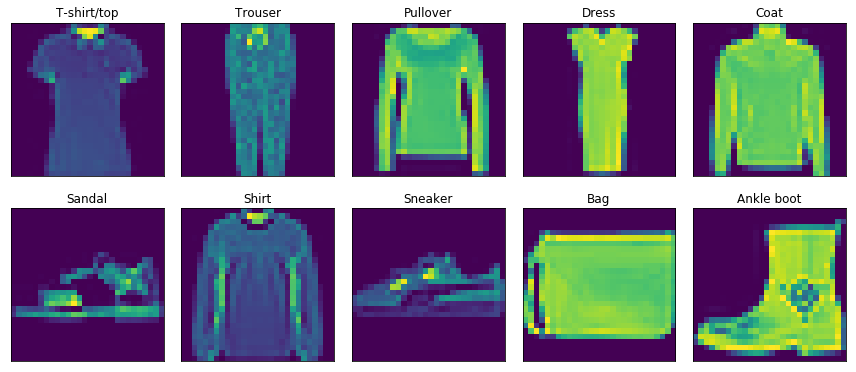

In [77]:
fig = plt.figure(figsize=(12,8))
for i in range(num_classes):
    plt.subplot(3,5,i+1)
    index = np.random.choice(np.where(data_train.iloc[:, 0][:]==i)[0])
    img = X_train[index].reshape(28,28)
    plt.imshow(img, interpolation='none')
    plt.xticks([]), plt.yticks([])
    plt.title(labels[i])
    plt.tight_layout()

In [42]:
# noramlizing the pixels values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Model

In [43]:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

**Custom model using Functional API:** Load a pre-trained model or create your own here!

In [47]:
def custom_model(input_shape=None, path=None):

    if input("If you want to load a model, enter 'yes'.\n") == 'yes':
        model_dir = '../saved_models' if not path else path
        model_name = input("Enter model name.\n") # ex: 'fashion_mnist_v1.h5'
        path = os.path.join(model_dir,model_name)
        assert os.path.isfile(path)
        return load_model(path)
    
    assert input_shape != None
    
    # layers
    _input = Input(shape=input_shape)    

    x1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(_input)
    x1 = MaxPooling2D((2, 2), padding='same')(x1)

    x2 = Conv2D(64, (3, 3), activation='relu')(x1)
    x2 = MaxPooling2D(pool_size=(2, 2))(x2)

    x3 = Conv2D(128, (3, 3), activation='relu')(x2)
    x3 = MaxPooling2D(pool_size=(2, 2))(x3)

    x4 = Flatten()(x3)
    x4 = Dense(128, activation='relu')(x4)
    x4 = Dense(64, activation='relu')(x4)
    x4 = Dropout(0.5)(x4)

    _output = Dense(num_classes, activation='softmax')(x4)

    # model
    model = Model(input = _input, output = _output)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [48]:
model = custom_model(input_shape)
model.summary()

If you want to load a model, enter 'yes'.
yes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (

### Training

**Set Training Parameters:**

In [49]:
batch_size = 512
epochs = 100
cbks = [EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=0, mode='auto'),
       ]

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks = cbks,
          validation_split=0.2)

In [50]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 376us/step


**Save Model:**

In [1]:
model_name = input("Enter model name.\n") # ex: 'fashion_mnist_v1.h5'
save_path = os.path.join('../saved_models', model_name)
if input("If you want to save the model, enter 'yes'.\n") == 'yes': model.save(save_path)

NameError: name 'os' is not defined

### Results
It turns out our classifier does better then the best baseline reported [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/), which is an SVM classifier with mean accuracy of 0.897.


In [51]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1989863913476467
Test accuracy: 0.929


### Plotting

**Training/Validation Loss and Accuracy:**

In [ ]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

In [ ]:
# plotting accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# plotting loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Classification Report
**Performance Summary:**

**Note**: If you use the functional API, you can't use predict_classes method. Therefore, you have to create your own.
**Why?** Check this [github issue](https://github.com/keras-team/keras/issues/2524) for more info.

In [52]:
def predict_classes(model, x, batch_size=32, verbose=1):
    '''Generate class predictions for the input samples
    batch by batch.
    # Returns
        A numpy array of class predictions.
    '''
    proba = model.predict(x, batch_size=batch_size, verbose=verbose)
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

In [72]:
# test predictions
predicted_classes = predict_classes(model, X_test)
# retrieve original labels
test_labels = y_test.argmax(axis=-1) # numpy function
train_labels = y_train.argmax(axis=-1) # numpy function

10000/10000 [==============================] - 4s 377us/step


In [55]:
# correct and incorrect predictions
correct_pred = np.where(predicted_classes == test_labels)[0]
incorrect_pred = np.where(predicted_classes != test_labels)[0]

In [57]:
from sklearn.metrics import classification_report
target_names = [labels[i] for i in range(num_classes)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

T-shirt/top       0.90      0.87      0.88      1000
    Trouser       0.99      0.99      0.99      1000
   Pullover       0.92      0.88      0.90      1000
      Dress       0.92      0.95      0.94      1000
       Coat       0.88      0.90      0.89      1000
     Sandal       0.99      0.97      0.98      1000
      Shirt       0.78      0.80      0.79      1000
    Sneaker       0.93      0.99      0.96      1000
        Bag       0.99      0.98      0.99      1000
 Ankle boot       0.98      0.95      0.97      1000

avg / total       0.93      0.93      0.93     10000



**Observations:**
- It's apparent that our classifier is having difficulties with class `Shirt` overall. 
- For classes `T-shirt/top`, `Pullover` and `Coat`, classifier has a lower than `avg/total` performance. 
- For other classes like `Trouser` and `Shoes`, in general our classifier performs much better.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Here is a subset of correctly predicted classes:

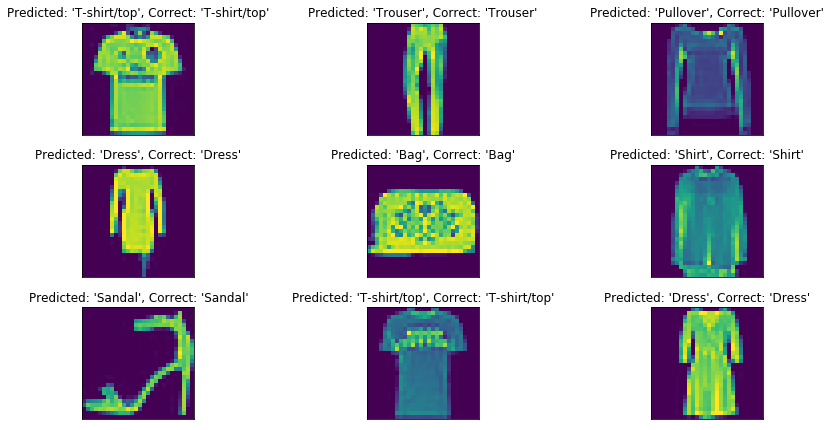

In [71]:
fig = plt.figure(figsize=(12,8))
for i, correct in enumerate(correct_pred[:9]):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), interpolation='none')
    plt.xticks([]), plt.yticks([])
    plt.title("Predicted: '{}', Correct: '{}'".format(labels[predicted_classes[correct]], labels[test_labels[correct]]))
    plt.tight_layout()

And here is a subset of incorrectly predicted classes:

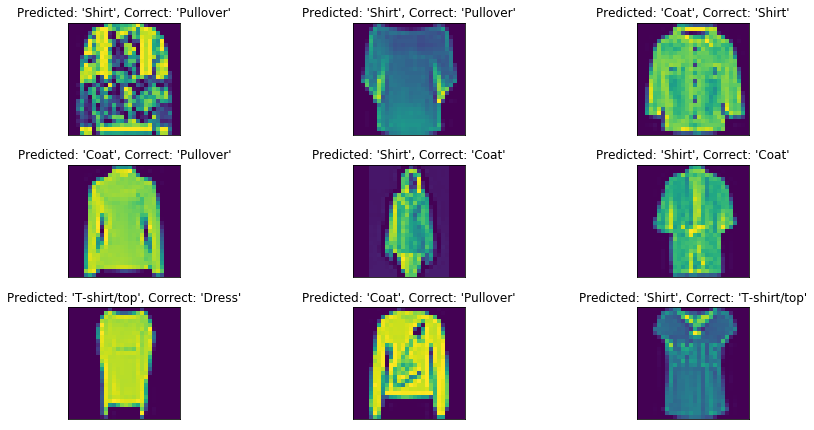

In [70]:
fig = plt.figure(figsize=(12,8))
for i, incorrect in enumerate(incorrect_pred[:9]):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), interpolation='none')
    plt.xticks([]), plt.yticks([])
    plt.title("Predicted: '{}', Correct: '{}'".format(labels[predicted_classes[incorrect]], labels[test_labels[incorrect]]))
    plt.tight_layout()

**Observations:**
- Diversity of the similar patterns present on multiple classes is derailing the prediction accuracy of the classifier.
- In a 28x28 image, a pullover looks similar to a shirt, jacket, coat etc. 
- Also presence/absence of long sleeves, buttons etc, is leading to misclassification.

### What do the activations look like?

In [73]:
index = np.random.choice(X_train.shape[0])

In [99]:
im = X_train[index]
im_label = train_labels[index]

Ankle boot


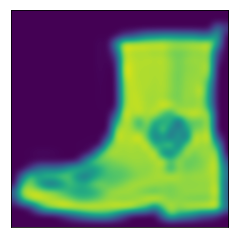

In [100]:
plt.imshow(im.reshape(28,28), cmap='viridis', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
print(labels[im_label])

Let's see the activation of the 2nd channel of the first layer:

In [101]:
layer_outputs = [layer.output for layer in model.layers if (layer.name).startswith('conv')]
activation_model = Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(im.reshape(1,28,28,1))

C:\Users\Jagan\Anaconda3\envs\deep-learning\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  


In [113]:
conv_acts = [activations[0].reshape(32,26,26,1), activations[1].reshape(64,11,11,1), 
            activations[2].reshape(128,3,3,1)]

Let's plot the activations of the other conv layers as well. ~ Pending